In [1]:
# load BestModel
import joblib
from scripts.Model import BestModel

model = joblib.load('BestModel.pkl')


In [2]:
import pandas as pd

# loading data from https://depmap.org/portal/ 
demap = pd.read_csv('data/OmicsExpressionProteinCodingGenesTPMLogp1.csv', index_col=0).T

import re
demap.index = [re.sub(r" \(.*",'', x) for x in demap.index]

# loading cell lineages metadata
cell_linages_meta = pd.read_csv('data/Model.csv', index_col=0)

cell_linages_meta = cell_linages_meta[cell_linages_meta['StrippedCellLineName'].isin(['IMR32','SKBR3','A431'])]

# selecting ['IMR32','SKBR3','A431']
demap = demap.loc[:,list(cell_linages_meta.index)]

# renaming columns to cell lineage ids
rename_col = dict(zip(cell_linages_meta.index, cell_linages_meta['StrippedCellLineName']))

demap = demap.rename(columns=rename_col)

demap.head()

,SKBR3,IMR32,A431
TSPAN6,2.523562,4.232661,4.469886
TNMD,0.000000,1.176323,0.000000
DPM1,7.109361,5.953032,7.151169
SCYL3,3.258519,2.632268,2.250962
C1orf112,3.886550,3.689299,4.198494


In [3]:
predictions = model.predict(demap)

print(predictions)

['SKBR3' 'IMR32' 'A431']


In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

tested = list(demap.columns)
# metrices
accuracy = accuracy_score(tested, predictions)
precision = precision_score(tested, predictions, average='weighted')  
recall = recall_score(tested, predictions, average='weighted') 
f1 = f1_score(tested, predictions, average='weighted')  

results = pd.DataFrame({
            'Model': model.name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

In [5]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,1.0,1.0,1.0,1.0


In [6]:
# features importance

importance_df = pd.DataFrame({
    'Feature': model.features,  # Nazwy cech
    'Importance': model.model.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [7]:
importance_df.head()

,Feature,Importance
121,FADS1,0.054698
50,TFAP2C,0.044730
139,ZFP82,0.039519
22,BNC1,0.038019
125,GNG4,0.035845


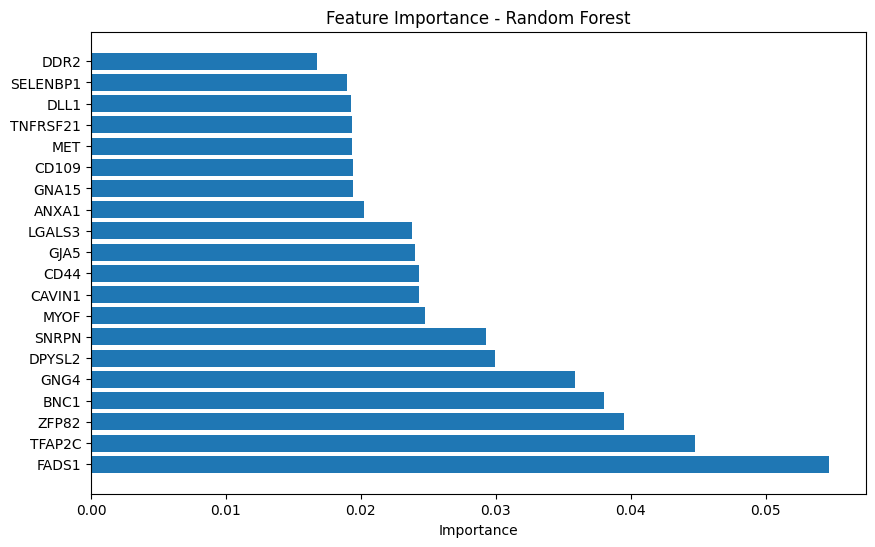

In [8]:
plot_importance = importance_df.iloc[list(range(0,20))]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(plot_importance['Feature'], plot_importance['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()